The following workbook is based on the UCI Bank Marketing Data Set; https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#
https://www.kaggle.com/shirantha/bank-marketing-data-a-decision-tree-approach

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import h2o
from h2o.estimators import H2ODeepLearningEstimator 

In [2]:
df = pd.read_csv("bank/bank-full.csv", sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Check for class imbalance

In [3]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

### Exploratory Data Anlysis

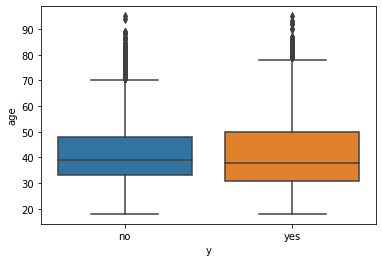

In [4]:
sns.boxplot(x=df['y'], y=df['age'])

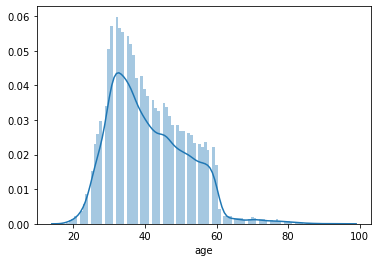

In [5]:
sns.distplot(df['age'], bins=100)

In [6]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

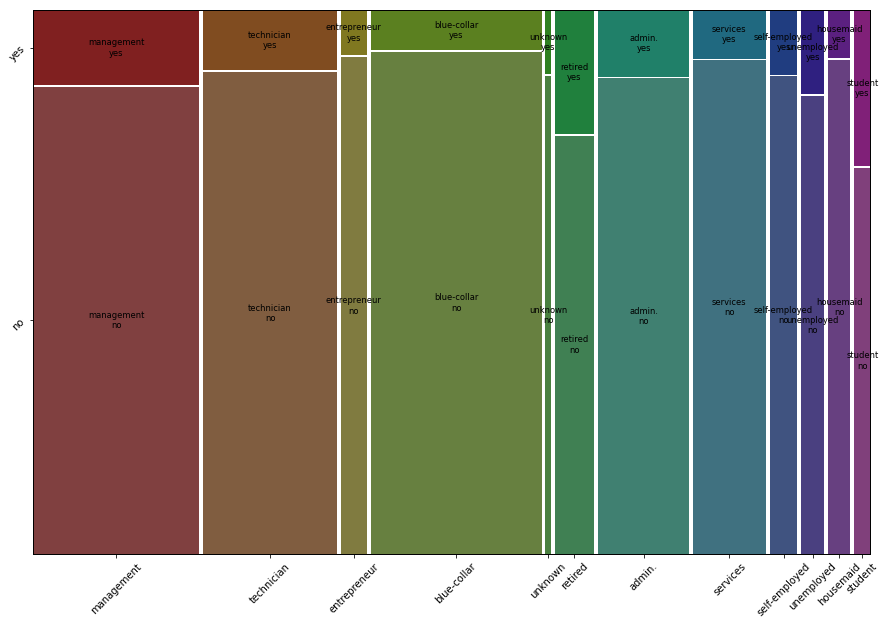

In [7]:
from statsmodels.graphics.mosaicplot import mosaic
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

_ = mosaic(df, ['job', 'y'], ax=ax, label_rotation=45)

poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Replace "other" with "unknown" since they both represent unspecified outcomes

In [8]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [9]:
df['poutcome'] = df['poutcome'].replace(['other'], 'unknown')

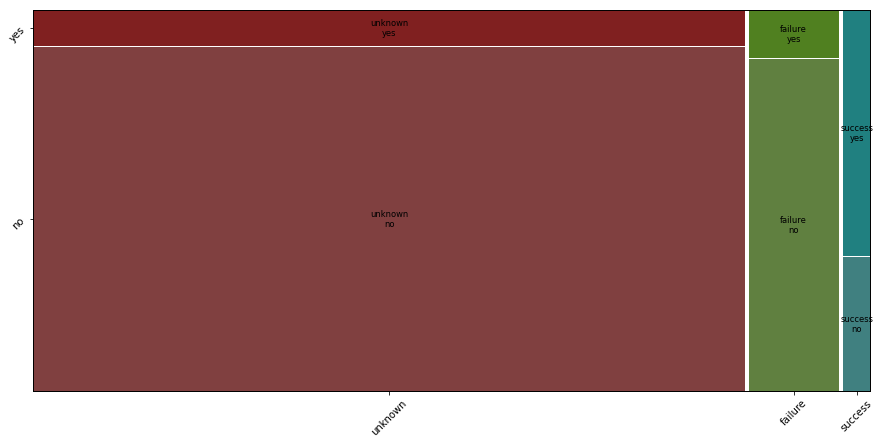

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

_ = mosaic(df, ['poutcome', 'y'], ax=ax, label_rotation=45)

Marital (status)

In [11]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

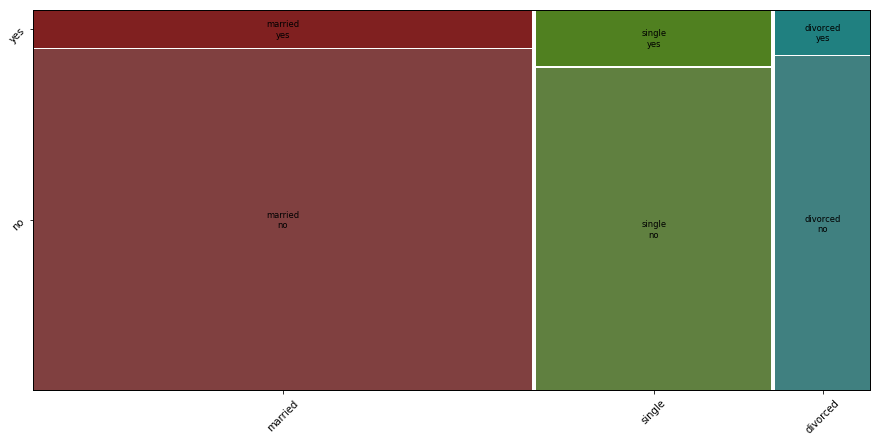

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

_ = mosaic(df, ['marital', 'y'], ax=ax, label_rotation=45)

Education

In [13]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

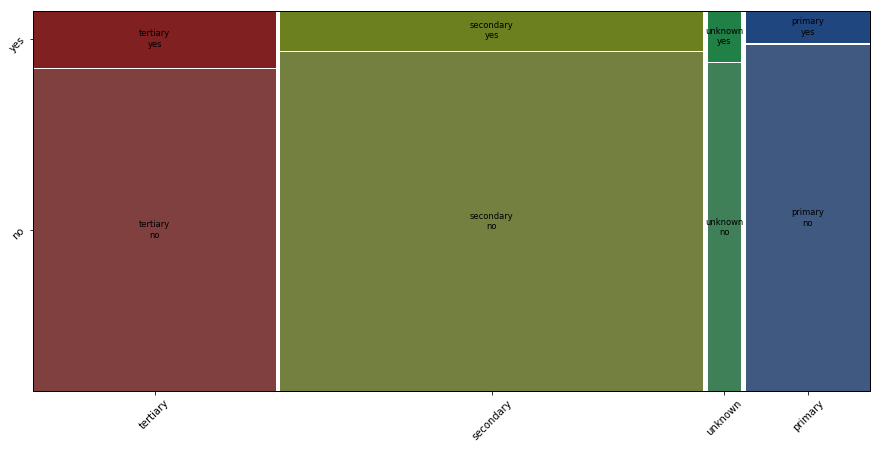

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

_ = mosaic(df, ['education', 'y'], ax=ax, label_rotation=45)

default: Indicating whether individual has credit in default

Manually map 'yes':1 and 'no':0

In [15]:
# Indicating whether individual has credit in default
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

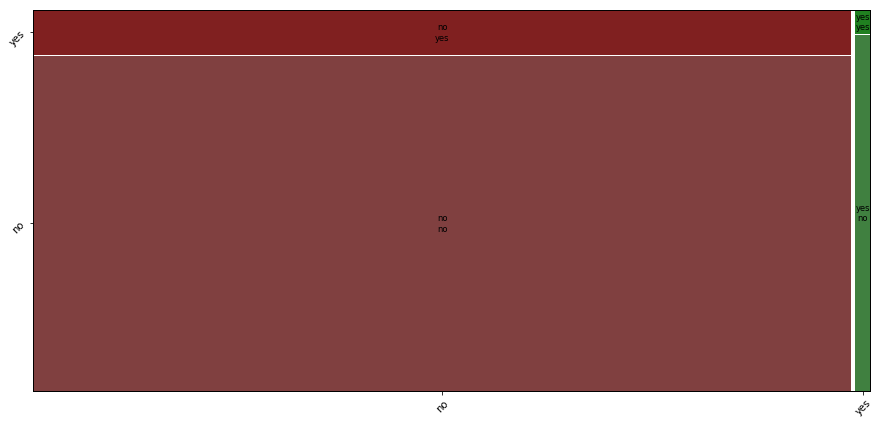

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

_ = mosaic(df, ['default', 'y'], ax=ax, label_rotation=45)

In [17]:
df['default_cat'] = df['default'].map( {'yes':1, 'no':0} )

In [18]:
df.drop(['default'], axis=1, inplace=True)

Balance: Remaining balance in account

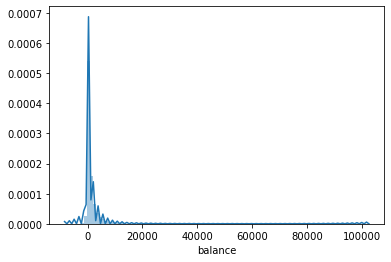

In [19]:
sns.distplot(df['balance'], bins=100)

[(0.0, 10000.0)]

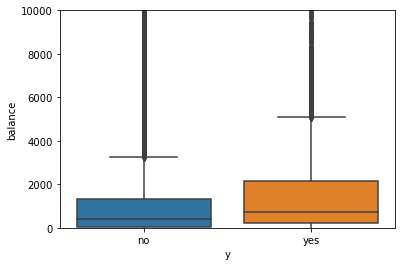

In [20]:
balance_plot = sns.boxplot(x=df['y'], y=df['balance'])
balance_plot.set(ylim=(0, 10000))

Housing (binary)

In [21]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

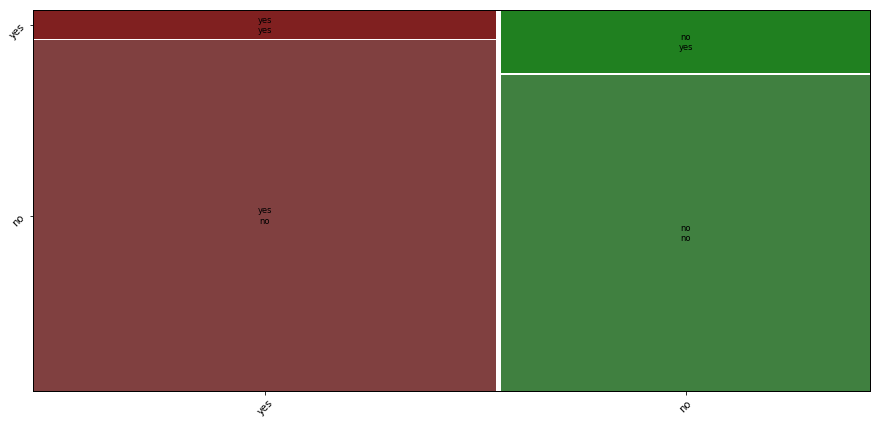

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

_ = mosaic(df, ['housing', 'y'], ax=ax, label_rotation=45)

In [23]:
df['housing_cat'] = df['housing'].map( {'yes':1, 'no':0} )

In [24]:
df.drop(['housing'], axis=1, inplace=True)

Loan (binary)

In [25]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

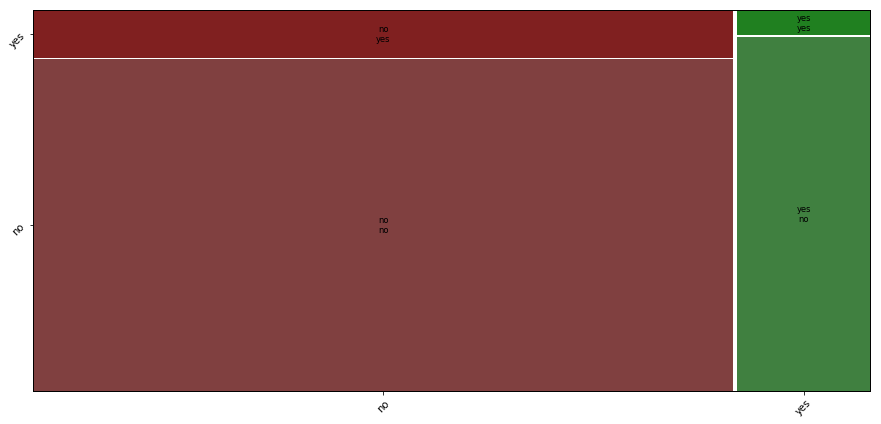

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

_ = mosaic(df, ['loan', 'y'], ax=ax, label_rotation=45)

In [27]:
df['loan_cat'] = df['loan'].map( {'yes':1, 'no':0} )

In [28]:
df.drop(['loan'], axis=1, inplace=True)

Remove "contact" column as every customer has been contacted

In [29]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [30]:
df.drop(['contact'], axis=1, inplace=True)

In [31]:
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

"campaign": Number of contacts performed during this campaign and for this client (numeric, includes last contact)

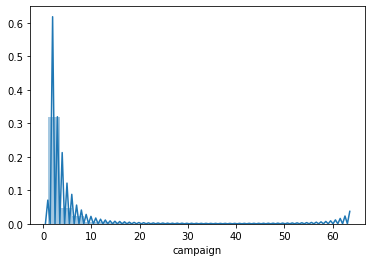

In [32]:
# number of contacts performed during this campaign and for this client (numeric, includes last contact)
df['campaign'].value_counts()
sns.distplot(df['campaign'], bins=25)

"previous": number of contacts performed before this campaign and for this client (numeric) - Dropping previous as the majority of obervations contain a value of zero

/Users/carsonransford/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


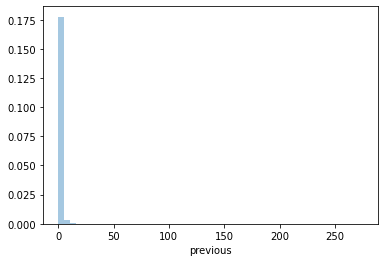

In [33]:
df['previous'].value_counts()
sns.distplot(df['previous'])

In [34]:
df['previous'].describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [35]:
df.drop(['previous'], axis=1, inplace=True)

pdays: -1 means client was not previously contacted. 
Create new fields to highlight records where no contact was made (not_contacted), as well as the number of days since last contact was made when available. Then drop 'pdays' column as it is no longer needed.

In [36]:
df['not_contacted'] = np.where(df['pdays']==-1, 1, 0)
df['not_contacted'].value_counts()

1    36954
0     8257
Name: not_contacted, dtype: int64

In [37]:
df['contact_days'] = np.where(df['pdays']!=-1, df['pdays'], 100)

In [38]:
df.drop('pdays', axis=1, inplace=True)

Since our intent is to test our ability to predict whether a customer subscribed to a term deposit, we cannot use "Duration" as this is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. 

Deposit (binary) - Originally labeled as 'y'

In [39]:
df['deposit_cat'] = df['y'].map( {'yes':1, 'no':0} )

In [40]:
df.drop(['y'], axis=1, inplace=True)

### Prep Data For Tuning using H2o

In [41]:
h2o.init(max_mem_size='25g')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "13.0.2" 2020-01-14; Java(TM) SE Runtime Environment (build 13.0.2+8); Java HotSpot(TM) 64-Bit Server VM (build 13.0.2+8, mixed mode, sharing)
  Starting server from /Users/carsonransford/opt/anaconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/kf/mmspqgqd1t5_75k5ybvv6v040000gn/T/tmpspdqooit
  JVM stdout: /var/folders/kf/mmspqgqd1t5_75k5ybvv6v040000gn/T/tmpspdqooit/h2o_carsonransford_started_from_python.out
  JVM stderr: /var/folders/kf/mmspqgqd1t5_75k5ybvv6v040000gn/T/tmpspdqooit/h2o_carsonransford_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month and 4 days
H2O_cluster_name:,H2O_from_python_carsonransford_mr6q8e
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,25 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"accepting new members, healthy"


In [42]:
h2_df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [43]:
h2_df.summary()

,age,job,marital,education,balance,day,month,duration,campaign,poutcome,default_cat,housing_cat,loan_cat,not_contacted,contact_days,deposit_cat
type,int,enum,enum,enum,int,int,enum,int,int,enum,int,int,int,int,int,int
mins,18.0,,,,-8019.0,1.0,,0.0,1.0,,0.0,0.0,0.0,0.0,1.0,0.0
mean,40.936210214327815,,,,1362.2720576850813,15.806418791886918,,258.1630797814686,2.7638406582468975,,0.018026586450200173,0.5558381809736569,0.16022649355245405,0.8173674548229414,122.75194089933805,0.11698480458295547
maxs,95.0,,,,102127.0,31.0,,4918.0,63.0,,1.0,1.0,1.0,1.0,871.0,1.0
sigma,10.618762040975405,,,,3044.7658291685257,8.322476153044592,,257.5278122651706,3.098020883279192,,0.13304893901674392,0.4968778102619631,0.3668200383232982,0.38636925407837625,68.89363221335093,0.3214057326156639
zeros,0,,,,3514,0,,3,0,,44396,20081,37967,8257,0,39922
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,2143.0,5.0,may,261.0,1.0,unknown,0.0,1.0,0.0,1.0,100.0,0.0
1,44.0,technician,single,secondary,29.0,5.0,may,151.0,1.0,unknown,0.0,1.0,0.0,1.0,100.0,0.0
2,33.0,entrepreneur,married,secondary,2.0,5.0,may,76.0,1.0,unknown,0.0,1.0,1.0,1.0,100.0,0.0


In [44]:
h2_df['job'] = h2_df['job'].asfactor()
h2_df['default_cat'] = h2_df['default_cat'].asfactor()
h2_df['housing_cat'] = h2_df['housing_cat'].asfactor()
h2_df['loan_cat'] = h2_df['loan_cat'].asfactor()
h2_df['not_contacted'] = h2_df['not_contacted'].asfactor()
h2_df['deposit_cat'] = h2_df['deposit_cat'].asfactor()

### Split data into Training, Validation, and Test

In [46]:
train,test,valid = h2_df.split_frame(ratios=[.7, .15])

In [48]:
X = train.columns
y = 'deposit_cat'
X.remove(y)

In [49]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.grid.grid_search import H2OGridSearch

### Perform Grid Search

In [50]:
activation_opt = ["Rectifier", "RectifierWithDropout"]
l1_opt = [0.00001, 0.0001]  # Lasso Regression with varying lambda values
# l2_opt = [0.00001, 0.0001] # Ridge Regression with varying lambda values
epochs = [25, 50, 75]
structure = [[25, 25], [25,25,25]] 

dl_params = {'hidden':structure
             , 'activation':activation_opt
             , 'epochs': epochs
             , 'l1': l1_opt # lasso regression with varying lambda values
#              , 'l2': l2_opt # ridge regression with varying lambda values
#              , 'input_dropout_ratio': [0, 0.1, 0.2]
             , 'rate': 0.1
             }

In [51]:
search_criteria = {'strategy': 'RandomDiscrete'
#      , 'max_runtime_secs': 1000
#      , 'max_models': 200
     , 'stopping_metric': 'AUCPR'
     , 'stopping_tolerance': 1e-4
     , 'stopping_rounds': 5
     , 'seed': 1}

In [53]:
dl_grid1 = H2OGridSearch(H2ODeepLearningEstimator
                          , grid_id='dl_grid1'
                          , hyper_params = dl_params
                          , search_criteria = search_criteria)

In [54]:
dl_grid1.train(x=X, y=y
                , training_frame=train
                , validation_frame=valid
                , balance_classes = True
                , max_after_balance_size = 3
                , categorical_encoding = 'label_encoder'
                , variable_importances = True
                , distribution = 'bernoulli'
              )

deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [55]:
dl_gridperf = dl_grid1.get_grid(sort_by='auc', decreasing=True)

In [56]:
best_dl_model = dl_gridperf.models[0]

Review Model Performance based on Training Set

In [57]:
best_dl_model.model_performance()


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.19706463635815327
RMSE: 0.4439196282641186
LogLoss: 0.5644239228565686
Mean Per-Class Error: 0.17597512761404266
AUC: 0.8959198133457316
AUCPR: 0.8737320501731677
Gini: 0.7918396266914631

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19015230588661836: 


,,0,1,Error,Rate
0,0,3699.0,1336.0,0.2653,(1336.0/5035.0)
1,1,472.0,4432.0,0.0962,(472.0/4904.0)
2,Total,4171.0,5768.0,0.1819,(1808.0/9939.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.190152,0.830585,279.0
1,max f2,0.090133,0.889491,325.0
2,max f0point5,0.369483,0.826659,193.0
3,max accuracy,0.252029,0.823423,254.0
4,max precision,0.859844,1.000000,0.0
5,max recall,0.010752,1.000000,390.0
6,max specificity,0.859844,1.000000,0.0
7,max absolute_mcc,0.246826,0.650229,256.0
8,max min_per_class_accuracy,0.304907,0.819331,228.0
9,max mean_per_class_accuracy,0.252029,0.824025,254.0



Gains/Lift Table: Avg response rate: 49.34 %, avg score: 27.79 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010061,0.740176,1.884843,1.884843,0.930000,0.779281,0.930000,0.779281,0.018964,0.018964,88.484299,88.484299,0.017574
1,2,0.020022,0.694990,1.903882,1.894315,0.939394,0.717665,0.934673,0.748628,0.018964,0.037928,90.388180,89.431456,0.035346
2,3,0.030084,0.670402,1.925377,1.904703,0.950000,0.681984,0.939799,0.726339,0.019372,0.057300,92.537724,90.470342,0.053725
3,4,0.040044,0.652076,1.985769,1.924868,0.979798,0.661722,0.949749,0.710266,0.019780,0.077080,98.576919,92.486802,0.073108
4,5,0.050005,0.635411,1.944825,1.928843,0.959596,0.643772,0.951710,0.697021,0.019372,0.096452,94.482550,92.884345,0.091685
5,6,0.100111,0.577939,1.916831,1.922831,0.945783,0.609906,0.948744,0.653420,0.096044,0.192496,91.683086,92.283112,0.182367
6,7,0.150116,0.504424,1.749416,1.865065,0.863179,0.539222,0.920241,0.615379,0.087480,0.279976,74.941615,86.506488,0.256341
7,8,0.200020,0.454536,1.781546,1.844227,0.879032,0.476325,0.909960,0.580686,0.088907,0.368883,78.154601,84.422717,0.333331
8,9,0.300030,0.412576,1.720871,1.803108,0.849095,0.430796,0.889671,0.530722,0.172104,0.540987,72.087090,80.310841,0.475644
9,10,0.400040,0.370396,1.596495,1.751455,0.787726,0.393936,0.864185,0.496526,0.159666,0.700653,59.649516,75.145510,0.593403


Review Model Performance based on Validation Set

In [67]:
best_dl_model.model_performance(valid)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.07980948487967938
RMSE: 0.28250572539274205
LogLoss: 0.2652879597531282
Mean Per-Class Error: 0.17526986460710403
AUC: 0.8871115797094486
AUCPR: 0.5001218405884994
Gini: 0.7742231594188973

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3776702494704726: 


,,0,1,Error,Rate
0,0,5397.0,642.0,0.1063,(642.0/6039.0)
1,1,277.0,540.0,0.339,(277.0/817.0)
2,Total,5674.0,1182.0,0.134,(919.0/6856.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.377670,0.540270,140.0
1,max f2,0.250208,0.669306,211.0
2,max f0point5,0.418829,0.523480,113.0
3,max accuracy,0.482189,0.893232,86.0
4,max precision,0.731014,0.800000,13.0
5,max recall,0.011073,1.000000,386.0
6,max specificity,0.820028,0.999669,0.0
7,max absolute_mcc,0.356427,0.479076,154.0
8,max min_per_class_accuracy,0.295444,0.811506,188.0
9,max mean_per_class_accuracy,0.250208,0.824730,211.0



Gains/Lift Table: Avg response rate: 11.92 %, avg score: 16.95 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010064,0.671103,5.351214,5.351214,0.637681,0.724539,0.637681,0.724539,0.053856,0.053856,435.121423,435.121423,0.049716
1,2,0.020128,0.633164,5.837688,5.594451,0.695652,0.651713,0.666667,0.688126,0.058752,0.112607,483.768826,459.445124,0.104990
2,3,0.030047,0.588501,5.676723,5.621609,0.676471,0.611072,0.669903,0.662691,0.056304,0.168911,467.672259,462.160877,0.157651
3,4,0.040111,0.548956,3.891792,5.187582,0.463768,0.569027,0.618182,0.639190,0.039168,0.208078,289.179217,418.758206,0.190691
4,5,0.050029,0.510017,4.689466,5.088830,0.558824,0.526386,0.606414,0.616826,0.046512,0.254590,368.946648,408.883029,0.232235
5,6,0.100058,0.427144,3.890019,4.489425,0.463557,0.460431,0.534985,0.538629,0.194614,0.449204,289.001931,348.942480,0.396381
6,7,0.150088,0.393199,3.131588,4.036812,0.373178,0.410033,0.481050,0.495763,0.156671,0.605875,213.158787,303.681249,0.517450
7,8,0.200117,0.357277,2.299760,3.602549,0.274052,0.374926,0.429300,0.465554,0.115055,0.720930,129.975984,260.254933,0.591273
8,9,0.300029,0.245959,1.482325,2.896495,0.176642,0.306114,0.345163,0.412459,0.148103,0.869033,48.232540,189.649518,0.645983
9,10,0.400088,0.130625,0.501543,2.297539,0.059767,0.179990,0.273788,0.354321,0.050184,0.919217,-49.845663,129.753895,0.589361


In [68]:
best_dl_model.show()

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl_grid1_model_24


Status of Neuron Layers: predicting deposit_cat, 2-class classification, bernoulli distribution, CrossEntropy loss, 1,102 weights/biases, 19.3 KB, 2,800,064 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,15,Input,0,,,,,,,,,
1,,2,25,RectifierDropout,50,0.0001,0,0.00064899,0.000635647,0,0.000289729,0.34513,-0.279655,0.262309
2,,3,25,RectifierDropout,50,0.0001,0,0.00228201,0.00173866,0,-0.208454,0.359813,0.112777,0.106038
3,,4,2,Softmax,,0.0001,0,0.00588157,0.00222964,0,0.0306628,1.26074,-0.347614,0.73016




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.19706463635815327
RMSE: 0.4439196282641186
LogLoss: 0.5644239228565686
Mean Per-Class Error: 0.17597512761404266
AUC: 0.8959198133457316
AUCPR: 0.8737320501731677
Gini: 0.7918396266914631

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19015230588661836: 


,,0,1,Error,Rate
0,0,3699.0,1336.0,0.2653,(1336.0/5035.0)
1,1,472.0,4432.0,0.0962,(472.0/4904.0)
2,Total,4171.0,5768.0,0.1819,(1808.0/9939.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.190152,0.830585,279.0
1,max f2,0.090133,0.889491,325.0
2,max f0point5,0.369483,0.826659,193.0
3,max accuracy,0.252029,0.823423,254.0
4,max precision,0.859844,1.000000,0.0
5,max recall,0.010752,1.000000,390.0
6,max specificity,0.859844,1.000000,0.0
7,max absolute_mcc,0.246826,0.650229,256.0
8,max min_per_class_accuracy,0.304907,0.819331,228.0
9,max mean_per_class_accuracy,0.252029,0.824025,254.0



Gains/Lift Table: Avg response rate: 49.34 %, avg score: 27.79 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010061,0.740176,1.884843,1.884843,0.930000,0.779281,0.930000,0.779281,0.018964,0.018964,88.484299,88.484299,0.017574
1,2,0.020022,0.694990,1.903882,1.894315,0.939394,0.717665,0.934673,0.748628,0.018964,0.037928,90.388180,89.431456,0.035346
2,3,0.030084,0.670402,1.925377,1.904703,0.950000,0.681984,0.939799,0.726339,0.019372,0.057300,92.537724,90.470342,0.053725
3,4,0.040044,0.652076,1.985769,1.924868,0.979798,0.661722,0.949749,0.710266,0.019780,0.077080,98.576919,92.486802,0.073108
4,5,0.050005,0.635411,1.944825,1.928843,0.959596,0.643772,0.951710,0.697021,0.019372,0.096452,94.482550,92.884345,0.091685
5,6,0.100111,0.577939,1.916831,1.922831,0.945783,0.609906,0.948744,0.653420,0.096044,0.192496,91.683086,92.283112,0.182367
6,7,0.150116,0.504424,1.749416,1.865065,0.863179,0.539222,0.920241,0.615379,0.087480,0.279976,74.941615,86.506488,0.256341
7,8,0.200020,0.454536,1.781546,1.844227,0.879032,0.476325,0.909960,0.580686,0.088907,0.368883,78.154601,84.422717,0.333331
8,9,0.300030,0.412576,1.720871,1.803108,0.849095,0.430796,0.889671,0.530722,0.172104,0.540987,72.087090,80.310841,0.475644
9,10,0.400040,0.370396,1.596495,1.751455,0.787726,0.393936,0.864185,0.496526,0.159666,0.700653,59.649516,75.145510,0.593403




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.07980948487967938
RMSE: 0.28250572539274205
LogLoss: 0.2652879597531282
Mean Per-Class Error: 0.17526986460710403
AUC: 0.8871115797094486
AUCPR: 0.5001218405884994
Gini: 0.7742231594188973

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3776702494704726: 


,,0,1,Error,Rate
0,0,5397.0,642.0,0.1063,(642.0/6039.0)
1,1,277.0,540.0,0.339,(277.0/817.0)
2,Total,5674.0,1182.0,0.134,(919.0/6856.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.377670,0.540270,140.0
1,max f2,0.250208,0.669306,211.0
2,max f0point5,0.418829,0.523480,113.0
3,max accuracy,0.482189,0.893232,86.0
4,max precision,0.731014,0.800000,13.0
5,max recall,0.011073,1.000000,386.0
6,max specificity,0.820028,0.999669,0.0
7,max absolute_mcc,0.356427,0.479076,154.0
8,max min_per_class_accuracy,0.295444,0.811506,188.0
9,max mean_per_class_accuracy,0.250208,0.824730,211.0



Gains/Lift Table: Avg response rate: 11.92 %, avg score: 16.95 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010064,0.671103,5.351214,5.351214,0.637681,0.724539,0.637681,0.724539,0.053856,0.053856,435.121423,435.121423,0.049716
1,2,0.020128,0.633164,5.837688,5.594451,0.695652,0.651713,0.666667,0.688126,0.058752,0.112607,483.768826,459.445124,0.104990
2,3,0.030047,0.588501,5.676723,5.621609,0.676471,0.611072,0.669903,0.662691,0.056304,0.168911,467.672259,462.160877,0.157651
3,4,0.040111,0.548956,3.891792,5.187582,0.463768,0.569027,0.618182,0.639190,0.039168,0.208078,289.179217,418.758206,0.190691
4,5,0.050029,0.510017,4.689466,5.088830,0.558824,0.526386,0.606414,0.616826,0.046512,0.254590,368.946648,408.883029,0.232235
5,6,0.100058,0.427144,3.890019,4.489425,0.463557,0.460431,0.534985,0.538629,0.194614,0.449204,289.001931,348.942480,0.396381
6,7,0.150088,0.393199,3.131588,4.036812,0.373178,0.410033,0.481050,0.495763,0.156671,0.605875,213.158787,303.681249,0.517450
7,8,0.200117,0.357277,2.299760,3.602549,0.274052,0.374926,0.429300,0.465554,0.115055,0.720930,129.975984,260.254933,0.591273
8,9,0.300029,0.245959,1.482325,2.896495,0.176642,0.306114,0.345163,0.412459,0.148103,0.869033,48.232540,189.649518,0.645983
9,10,0.400088,0.130625,0.501543,2.297539,0.059767,0.179990,0.273788,0.354321,0.050184,0.919217,-49.845663,129.753895,0.589361




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-11-01 18:02:52,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-11-01 18:02:53,2 min 49.078 sec,442371 obs/sec,1.792391,1,99976.0,0.406205,0.501073,0.339875,...,0.844784,1.824042,0.210585,0.352962,0.394603,-0.186887,0.864497,0.462162,5.716070,0.146733
2,,2020-11-01 18:02:56,2 min 52.681 sec,739388 obs/sec,50.200151,28,2800064.0,0.443920,0.564424,0.211604,...,0.873732,1.884843,0.181910,0.282506,0.265288,0.239658,0.887112,0.500122,5.351214,0.134043



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,month,1.000000,1.000000,0.176088
1,duration,0.928738,0.928738,0.163539
2,not_contacted,0.654132,0.654132,0.115185
3,poutcome,0.571830,0.571830,0.100692
4,campaign,0.468861,0.468861,0.082561
5,age,0.382145,0.382145,0.067291
6,housing_cat,0.320913,0.320913,0.056509
7,contact_days,0.318069,0.318069,0.056008
8,balance,0.209460,0.209460,0.036883
9,loan_cat,0.181412,0.181412,0.031944


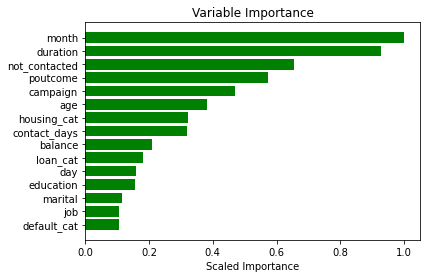

In [63]:
import matplotlib.pyplot as plt
plt.rcdefaults
fig, ax = plt.subplots()
variables = best_dl_model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = best_dl_model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel("Scaled Importance")
ax.set_title("Variable Importance")
plt.show()

In [62]:
best_dl_model._model_json['output']['variable_importances'].as_data_frame()

,variable,relative_importance,scaled_importance,percentage
0,month,1.000000,1.000000,0.176088
1,duration,0.928738,0.928738,0.163539
2,not_contacted,0.654132,0.654132,0.115185
3,poutcome,0.571830,0.571830,0.100692
4,campaign,0.468861,0.468861,0.082561
5,age,0.382145,0.382145,0.067291
6,housing_cat,0.320913,0.320913,0.056509
7,contact_days,0.318069,0.318069,0.056008
8,balance,0.209460,0.209460,0.036883
9,loan_cat,0.181412,0.181412,0.031944


Predict on Test Set

In [69]:
predictions = best_dl_model.predict(test)

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [70]:
predictions.show()

predict,p0,p1
0,0.959591,0.0404085
0,0.938331,0.0616687
0,0.991119,0.00888088
0,0.993761,0.00623865
0,0.978958,0.0210424
0,0.958944,0.0410564
1,0.603819,0.396181
0,0.932101,0.0678988
0,0.948723,0.0512773
1,0.572949,0.427051


### Show performance on Test Set
When tuned for max F1 score our model produces a Recall of 0.63 and Precision score of 0.52

In [83]:
test['deposit_cat'].table()

deposit_cat,Count
0,6012
1,783


In [71]:
performance = best_dl_model.model_performance(test)
performance.show()


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.07713756374686088
RMSE: 0.27773650056638377
LogLoss: 0.260369400906924
Mean Per-Class Error: 0.17593166158105245
AUC: 0.8907662537844702
AUCPR: 0.5147636674466868
Gini: 0.7815325075689403

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3974069148077708: 


,,0,1,Error,Rate
0,0,5556.0,456.0,0.0758,(456.0/6012.0)
1,1,288.0,495.0,0.3678,(288.0/783.0)
2,Total,5844.0,951.0,0.1095,(744.0/6795.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.397407,0.570934,127.0
1,max f2,0.326019,0.670758,168.0
2,max f0point5,0.405375,0.542950,122.0
3,max accuracy,0.536639,0.897130,65.0
4,max precision,0.774438,0.769231,6.0
5,max recall,0.010515,1.000000,387.0
6,max specificity,0.868800,0.999834,0.0
7,max absolute_mcc,0.397407,0.512014,127.0
8,max min_per_class_accuracy,0.296284,0.821357,185.0
9,max mean_per_class_accuracy,0.314660,0.824068,174.0



Gains/Lift Table: Avg response rate: 11.52 %, avg score: 16.75 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010007,0.659534,5.615281,5.615281,0.647059,0.722117,0.647059,0.722117,0.056194,0.056194,461.528059,461.528059,0.052202
1,2,0.020015,0.616562,7.529581,6.572431,0.867647,0.637457,0.757353,0.679787,0.075351,0.131545,652.958080,557.243070,0.126056
2,3,0.030022,0.572469,4.849561,5.998141,0.558824,0.596237,0.691176,0.651937,0.048531,0.180077,384.956051,499.814064,0.169598
3,4,0.040029,0.535153,4.721941,5.679091,0.544118,0.555971,0.654412,0.627945,0.047254,0.227331,372.194050,467.909060,0.211695
4,5,0.050037,0.503587,3.062880,5.155849,0.352941,0.517899,0.594118,0.605936,0.030651,0.257982,206.288032,415.584855,0.235028
5,6,0.100074,0.423808,4.364604,4.760227,0.502941,0.455452,0.548529,0.530694,0.218391,0.476373,336.460446,376.022650,0.425308
6,7,0.150110,0.388109,3.547836,4.356096,0.408824,0.406858,0.501961,0.489416,0.177522,0.653895,254.783638,335.609646,0.569398
7,8,0.200000,0.347802,2.150341,3.805875,0.247788,0.367855,0.438558,0.459093,0.107280,0.761175,115.034076,280.587484,0.634262
8,9,0.300074,0.241329,1.072008,2.894139,0.123529,0.297272,0.333497,0.405126,0.107280,0.868455,7.200811,189.413900,0.642407
9,10,0.400000,0.126618,0.549574,2.308429,0.063328,0.179185,0.266004,0.348682,0.054917,0.923372,-45.042574,130.842912,0.591535


In [78]:
performance.precision()

[[0.774438274149716, 0.7692307692307693]]

In [84]:
best_dl_model.F1(performance)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.07713756374686088
RMSE: 0.27773650056638377
LogLoss: 0.260369400906924
Mean Per-Class Error: 0.17593166158105245
AUC: 0.8907662537844702
AUCPR: 0.5147636674466868
Gini: 0.7815325075689403

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3974069148077708: 


,,0,1,Error,Rate
0,0,5556.0,456.0,0.0758,(456.0/6012.0)
1,1,288.0,495.0,0.3678,(288.0/783.0)
2,Total,5844.0,951.0,0.1095,(744.0/6795.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.397407,0.570934,127.0
1,max f2,0.326019,0.670758,168.0
2,max f0point5,0.405375,0.542950,122.0
3,max accuracy,0.536639,0.897130,65.0
4,max precision,0.774438,0.769231,6.0
5,max recall,0.010515,1.000000,387.0
6,max specificity,0.868800,0.999834,0.0
7,max absolute_mcc,0.397407,0.512014,127.0
8,max min_per_class_accuracy,0.296284,0.821357,185.0
9,max mean_per_class_accuracy,0.314660,0.824068,174.0



Gains/Lift Table: Avg response rate: 11.52 %, avg score: 16.75 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010007,0.659534,5.615281,5.615281,0.647059,0.722117,0.647059,0.722117,0.056194,0.056194,461.528059,461.528059,0.052202
1,2,0.020015,0.616562,7.529581,6.572431,0.867647,0.637457,0.757353,0.679787,0.075351,0.131545,652.958080,557.243070,0.126056
2,3,0.030022,0.572469,4.849561,5.998141,0.558824,0.596237,0.691176,0.651937,0.048531,0.180077,384.956051,499.814064,0.169598
3,4,0.040029,0.535153,4.721941,5.679091,0.544118,0.555971,0.654412,0.627945,0.047254,0.227331,372.194050,467.909060,0.211695
4,5,0.050037,0.503587,3.062880,5.155849,0.352941,0.517899,0.594118,0.605936,0.030651,0.257982,206.288032,415.584855,0.235028
5,6,0.100074,0.423808,4.364604,4.760227,0.502941,0.455452,0.548529,0.530694,0.218391,0.476373,336.460446,376.022650,0.425308
6,7,0.150110,0.388109,3.547836,4.356096,0.408824,0.406858,0.501961,0.489416,0.177522,0.653895,254.783638,335.609646,0.569398
7,8,0.200000,0.347802,2.150341,3.805875,0.247788,0.367855,0.438558,0.459093,0.107280,0.761175,115.034076,280.587484,0.634262
8,9,0.300074,0.241329,1.072008,2.894139,0.123529,0.297272,0.333497,0.405126,0.107280,0.868455,7.200811,189.413900,0.642407
9,10,0.400000,0.126618,0.549574,2.308429,0.063328,0.179185,0.266004,0.348682,0.054917,0.923372,-45.042574,130.842912,0.591535




ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.07713756374686088
RMSE: 0.27773650056638377
LogLoss: 0.260369400906924
Mean Per-Class Error: 0.17593166158105245
AUC: 0.8907662537844702
AUCPR: 0.5147636674466868
Gini: 0.7815325075689403

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3974069148077708: 


,,0,1,Error,Rate
0,0,5556.0,456.0,0.0758,(456.0/6012.0)
1,1,288.0,495.0,0.3678,(288.0/783.0)
2,Total,5844.0,951.0,0.1095,(744.0/6795.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.397407,0.570934,127.0
1,max f2,0.326019,0.670758,168.0
2,max f0point5,0.405375,0.542950,122.0
3,max accuracy,0.536639,0.897130,65.0
4,max precision,0.774438,0.769231,6.0
5,max recall,0.010515,1.000000,387.0
6,max specificity,0.868800,0.999834,0.0
7,max absolute_mcc,0.397407,0.512014,127.0
8,max min_per_class_accuracy,0.296284,0.821357,185.0
9,max mean_per_class_accuracy,0.314660,0.824068,174.0



Gains/Lift Table: Avg response rate: 11.52 %, avg score: 16.75 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010007,0.659534,5.615281,5.615281,0.647059,0.722117,0.647059,0.722117,0.056194,0.056194,461.528059,461.528059,0.052202
1,2,0.020015,0.616562,7.529581,6.572431,0.867647,0.637457,0.757353,0.679787,0.075351,0.131545,652.958080,557.243070,0.126056
2,3,0.030022,0.572469,4.849561,5.998141,0.558824,0.596237,0.691176,0.651937,0.048531,0.180077,384.956051,499.814064,0.169598
3,4,0.040029,0.535153,4.721941,5.679091,0.544118,0.555971,0.654412,0.627945,0.047254,0.227331,372.194050,467.909060,0.211695
4,5,0.050037,0.503587,3.062880,5.155849,0.352941,0.517899,0.594118,0.605936,0.030651,0.257982,206.288032,415.584855,0.235028
5,6,0.100074,0.423808,4.364604,4.760227,0.502941,0.455452,0.548529,0.530694,0.218391,0.476373,336.460446,376.022650,0.425308
6,7,0.150110,0.388109,3.547836,4.356096,0.408824,0.406858,0.501961,0.489416,0.177522,0.653895,254.783638,335.609646,0.569398
7,8,0.200000,0.347802,2.150341,3.805875,0.247788,0.367855,0.438558,0.459093,0.107280,0.761175,115.034076,280.587484,0.634262
8,9,0.300074,0.241329,1.072008,2.894139,0.123529,0.297272,0.333497,0.405126,0.107280,0.868455,7.200811,189.413900,0.642407
9,10,0.400000,0.126618,0.549574,2.308429,0.063328,0.179185,0.266004,0.348682,0.054917,0.923372,-45.042574,130.842912,0.591535


H2OTypeError: Argument `thresholds` should be a None | "all" | numeric | list(numeric), got H2OBinomialModelMetrics 


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.07713756374686088
RMSE: 0.27773650056638377
LogLoss: 0.260369400906924
Mean Per-Class Error: 0.17593166158105245
AUC: 0.8907662537844702
AUCPR: 0.5147636674466868
Gini: 0.7815325075689403

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3974069148077708: 


,,0,1,Error,Rate
0,0,5556.0,456.0,0.0758,(456.0/6012.0)
1,1,288.0,495.0,0.3678,(288.0/783.0)
2,Total,5844.0,951.0,0.1095,(744.0/6795.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.397407,0.570934,127.0
1,max f2,0.326019,0.670758,168.0
2,max f0point5,0.405375,0.542950,122.0
3,max accuracy,0.536639,0.897130,65.0
4,max precision,0.774438,0.769231,6.0
5,max recall,0.010515,1.000000,387.0
6,max specificity,0.868800,0.999834,0.0
7,max absolute_mcc,0.397407,0.512014,127.0
8,max min_per_class_accuracy,0.296284,0.821357,185.0
9,max mean_per_class_accuracy,0.314660,0.824068,174.0



Gains/Lift Table: Avg response rate: 11.52 %, avg score: 16.75 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010007,0.659534,5.615281,5.615281,0.647059,0.722117,0.647059,0.722117,0.056194,0.056194,461.528059,461.528059,0.052202
1,2,0.020015,0.616562,7.529581,6.572431,0.867647,0.637457,0.757353,0.679787,0.075351,0.131545,652.958080,557.243070,0.126056
2,3,0.030022,0.572469,4.849561,5.998141,0.558824,0.596237,0.691176,0.651937,0.048531,0.180077,384.956051,499.814064,0.169598
3,4,0.040029,0.535153,4.721941,5.679091,0.544118,0.555971,0.654412,0.627945,0.047254,0.227331,372.194050,467.909060,0.211695
4,5,0.050037,0.503587,3.062880,5.155849,0.352941,0.517899,0.594118,0.605936,0.030651,0.257982,206.288032,415.584855,0.235028
5,6,0.100074,0.423808,4.364604,4.760227,0.502941,0.455452,0.548529,0.530694,0.218391,0.476373,336.460446,376.022650,0.425308
6,7,0.150110,0.388109,3.547836,4.356096,0.408824,0.406858,0.501961,0.489416,0.177522,0.653895,254.783638,335.609646,0.569398
7,8,0.200000,0.347802,2.150341,3.805875,0.247788,0.367855,0.438558,0.459093,0.107280,0.761175,115.034076,280.587484,0.634262
8,9,0.300074,0.241329,1.072008,2.894139,0.123529,0.297272,0.333497,0.405126,0.107280,0.868455,7.200811,189.413900,0.642407
9,10,0.400000,0.126618,0.549574,2.308429,0.063328,0.179185,0.266004,0.348682,0.054917,0.923372,-45.042574,130.842912,0.591535


In [79]:
performance.recall()

[[0.010515148871089038, 1.0]]

In [81]:
performance.F1()

[[0.3974069148077708, 0.5709342560553634]]

In [80]:
performance.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3974069148077708: 


,,0,1,Error,Rate
0,0,5556.0,456.0,0.0758,(456.0/6012.0)
1,1,288.0,495.0,0.3678,(288.0/783.0)
2,Total,5844.0,951.0,0.1095,(744.0/6795.0)


In [82]:
performance.gini()

0.7815325075689403

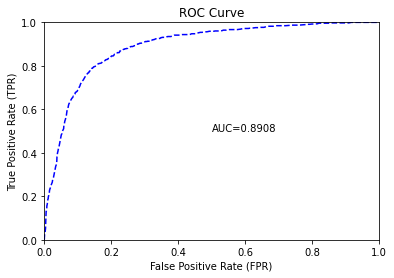

In [85]:
performance.plot(type='roc')

In [86]:
h2o.shutdown(prompt = False)

<ipython-input-86-b3a1aba4ba88>:1: DeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown(prompt = False)


H2O session _sid_982e closed.
